# 爬虫准备工作
- 参考资料
    - python网络数据采集， 图灵工业出版
    - 精通Python爬虫框架Scrapy， 人民邮电出版社
    - [Python3网络爬虫](https://blog.csdn.net/c406495762/article/details/72858983)
    - [Scrapy官方教程](https://scrapy-chs.readthedocs.io/zh_CN/0.24/intro/tutorial.html)
- 前提知识
    - url
    - http协议
    - web前端，html, css, js
    - ajax
    - re, xpath
    - xml

# 1. 爬虫简介

- 爬虫定义：网络爬虫（又被称为网页蜘蛛，网络机器人，在FOAF社区中间，更经常的称为网页追逐者）， 是一种按照一定的规则，自动地抓取万维网信息的程序或者脚本。 另外一些不常使用的名字还有蚂蚁、自动索引、模拟程序或者蠕虫。
- 两大特征
    - 能按作者要求下载数据或者内容
    - 能自动在网络上流窜
- 三大步骤：
    - 下载网页
    - 提取正确的信息
    - 根据一定规则自动跳到另外的网页上执行上两步内容
- 爬虫分类
    - 通用爬虫
    - 专用爬虫（聚焦爬虫）
- Python网络包简介
    - Python2.x：urllib, urllib2, urllib3, httplib, httplib2, requests
    - Python3.x: urllib, urllib3, httplib2, requests
    - python2: urllib和urllib2配合使用，或者requests
    - Python3： urllib，requests


# 2. urllib
### 包含模块
- urllib.request: 打开和读取urls
- urllib.error： 包含urllib.request产生的常见的错误，使用try捕捉
- urllib.parse: 包含解析url的方法
- urllib.robotparse: 解析robots.txt文件
- [RTFM](https://docs.python.org/3/library/index.html)
- 案例v1

# 网页编码问题解决
- chardet 可以自动检测页面文件的编码格式，但是，可能有误
- 需要安装， pip install chardet
- RTFM
- 案例v2

# urlopen 的返回对象
- 案例v3
- geturl: 返回请求对象的url
- info: 请求反馈对象的meta信息
- getcode：返回的http code


# request.data 的使用
- 访问网络的两种方法
    - get
        - 利用参数给服务器传递信息
        - 参数为dict，然后用parse编码
        - 案例v4
- post
    - 一般向服务器传递参数使用
    - post是把信息自动加密处理
    - 我们如果想使用psot信息，需要用到data参数
    - 使用post，意味着Http的请求头可能需要更改：
        - Content-Type: application/x-www.form-urlencode
        - Content-Length: 数据长度
        - 简而言之，一旦更改请求方法，请注意其他请求头部信息相适应
    - urllib.parse.urlencode 可以将字符串自动转换成上面的形式
    - 案例v5
    - 为了更多的设置请求信息，单纯的通过urlopen函数已经不太好用了
    - 需要利用request.Request 类
    - 案例V6

    

### urllib.error
- URLError产生的原因：
    - 没网
    - 服务器链接失败
    - 找不到服务器
    - 是OSError的子类
    - RTFB
    - 案例V7
- HTTPError, 是URLError的一个子类
    - 案例v8
    
- 两者区别：
    - HTTPError 是对应的HTTP请求的返回码错误, 如果返回错误码是400以上的，则引发HTTPError
    - URLError 对应的一般是网络出现问题，包括url问题
    - 关系区别： OSError-URLError-HTTPError

# UserAgent
- UserAgent： 用户代理，简称UA， 属于heads的一部分，服务器通过UA来判断访问者身份
- 常见的UA值，使用的时候可以直接复制粘贴，也可以用浏览器访问的时候抓包
- 1. Android
```
Mozilla/5.0 (Linux; Android 4.1.1; Nexus 7 Build/JRO03D) AppleWebKit/535.19 (KHTML, like Gecko) Chrome/18.0.1025.166 Safari/535.19
Mozilla/5.0 (Linux; U; Android 4.0.4; en-gb; GT-I9300 Build/IMM76D) AppleWebKit/534.30 (KHTML, like Gecko) Version/4.0 Mobile Safari/534.30
Mozilla/5.0 (Linux; U; Android 2.2; en-gb; GT-P1000 Build/FROYO) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1
```
- 2. Firefox
```
Mozilla/5.0 (Windows NT 6.2; WOW64; rv:21.0) Gecko/20100101 Firefox/21.0
Mozilla/5.0 (Android; Mobile; rv:14.0) Gecko/14.0 Firefox/14.0
```
- 3. Google Chrome
```
Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.94 Safari/537.36
Mozilla/5.0 (Linux; Android 4.0.4; Galaxy Nexus Build/IMM76B) AppleWebKit/535.19 (KHTML, like Gecko) Chrome/18.0.1025.133 Mobile Safari/535.19
```
- 4. iOS
```
Mozilla/5.0 (iPad; CPU OS 5_0 like Mac OS X) AppleWebKit/534.46 (KHTML, like Gecko) Version/5.1 Mobile/9A334 Safari/7534.48.3
Mozilla/5.0 (iPod; U; CPU like Mac OS X; en) AppleWebKit/420.1 (KHTML, like Gecko) Version/3.0 Mobile/3A101a Safari/419.3
```
- 设置UA可以通过两种方式：
    - heads
    - add_header
    - 案例v9

# ProxyHandler处理（代理服务器）
- 使用代理IP，是爬虫的常用手段
- 获取代理服务器的地址：
    - www.xicidaili.com
    - www.goubanjia.com
- 代理用来隐藏真实访问中，代理也不允许频繁访问某一个固定网站，所以，代理一定要很多很多
- 基本使用步骤：
    - 设置代理地址
    - 创建ProxyHandler
    - 创建Opener
    - 安装Opener
- 案例v10

# cookie & session
- 由于http协议的无记忆性，人们为了弥补这个缺憾，所采用的一个补充协议
- cookie是发放给用户（即http浏览器）的一段信息，session是保存在服务器上的对应的另一半信息，用来记录用户信息
- cookie和session的区别
    - 存放位置不同
    - cookie不安全
    - session会保存在服务器上一定时间，会过期
    - 单个cookie保存数据不超过4k， 很多浏览器限制一个站点最多保存20个
    
    
- session的存放位置
    - 存在服务器端
    - 一般情况，session是放在内存中或者数据库中
    - 没有cookie登录 案例v11,可以看到，没使用cookie则反馈网页为未登录状态
    
    
- 使用cookie登录
    - 直接把cookie复制下来，然后手动放入请求头， 案例 v12
    - http模块包含一些关于cookie的模块，通过他们我们可以自动使用cookie
        - CookieJar
            - 管理存储cookie，向传出的http请求添加cookie，
            - cookie存储在内存中，CookieJar实例回收后cookie将消失
            
        - FileCookieJar(filename, delayload=None, policy=None):
            - 使用文件管理cookie
            - filename是保存cookie的文件
            
        - MozillaCookieJar(filename, delayload=None, policy=None):
            - 创建与mocilla浏览器cookie.txt兼容的FileCookieJar实例   
            
        - LwpCookieJar(filename, delayload=None, policy=None):
            - 创建与libwww-perl标准兼容的Set-Cookie3格式的FileCookieJar实例
                  
        - 他们的关系是: CookieJar–>FileCookieJar–>MozillaCookieJar & LwpCookieJar
        
        
- 利用cookiejar访问人人， 案例13
    - 自动使用cookie登录，大致流程是
        - 打开登录页面后自动通过用户名密码登录
        - 自动提取反馈回来的cookie
        - 利用提取的cookie登录隐私页面

- handler是Handler的实例，常用参看案例代码
    - 用来处理复杂请求# 生成 cookie的管理器
    - cookie_handler = request.HTTPCookieProcessor(cookie)
    - \# 创建http请求管理器
    - http_handler = request.HTTPHandler()
    - \# 生成https管理器
    - https_handler = request.HTTPSHandler()
- 创立handler后，使用opener打开，打开后相应的业务由相应的hanlder处理
- cookie作为一个变量，打印出来, 案例 v14
    - cookie的属性
        - name: 名称
        - value： 值
        - domain：可以访问此cookie的域名
        - path： 可以发昂文此cookie的页面路径
        - expires：过期时间
        - size： 大小
        - Http字段
- cookie的保存-FileCookieJar， 案例v15
- cookie的读取， 案例v16

# SSL
- SSL证书就是指遵守SSL安全套阶层协议的服务器数字证书（SercureSocketLayer)
- 美国网景公司开发
- CA（CertifacateAuthority)是数字证书认证中心，是发放，管理，废除数字证书的收信人的第三方机构
- 遇到不信任的SSL证书，需要单独处理，案例v17

# js加密
- 有的反爬虫策略采用js对需要传输的数据进行加密处理（通常是取md5值)
- 经过加密，传输的就是密文，但是
- 加密函数或者过程一定是在浏览器完成，也就是一定会把代码（js代码）暴露给使用者
- 通过阅读加密算法，就可以模拟出加密过程，从而达到破解
- 过程参看案例v18, v19

# ajax
- AJAX = 异步 JavaScript 和 XML。
- AJAX 是一种用于创建快速动态网页的技术。
- 通过在后台与服务器进行少量数据交换，AJAX 可以使网页实现异步更新。这意味着可以在不重新加载整个网页的情况下，对网页的某部分进行更新
- 传统的网页（不使用 AJAX）如果需要更新内容，必需重载整个网页面。
- 有很多使用 AJAX 的应用程序案例：新浪微博、Google 地图、开心网等等。
- 案例，爬取豆瓣电影， 案例v20


# Requests-献给人类
- HTTP for Humans，更简洁更友好
- 继承了urllib的所有特征
- 底层使用的是urllib3
- 开源地址： https://github.com/requests/requests
- 中文文档： http://docs.python-requests.org/zh_CN/latest/index.html
- 安装： conda install requests


### get请求
- requests.get(url)
- requests.request("get",url)
- 可以带有headers和parmas参数
- 案例v21

### get返回内容
- 案例v22

### post
- rsp = requests.post(url, data=data)
- date, headers要求dict类型
- 案例v23

### proxy
~~~
proxies = {
"http":"address of proxy",
"https": "address of proxy"
}
​
rsp = requests.request("get", "http:xxxxxx", proxies=proxies)
~~~
- 代理有可能报错，如果使用人数多，考虑安全问题，可能会被强行关闭
- 用户验证
    - 代理验证
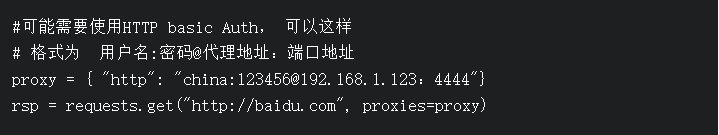 


### web客户端验证
- 如果遇到web客户端验证，需要添加auth=（用户名，密码）
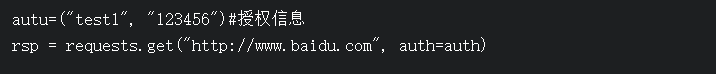

### cookie
- requests可以自动处理cookie信息
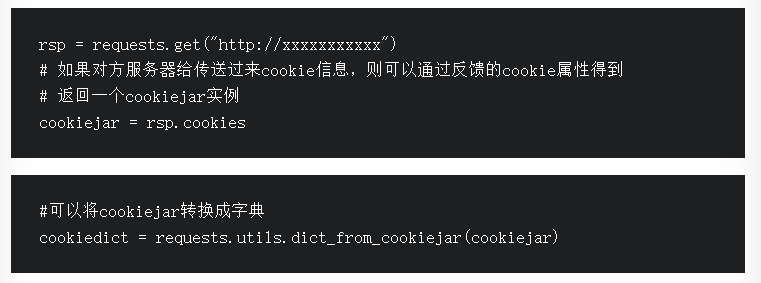


### session
- 跟服务器端session不是一个东东
- 模拟一次会话，从客户端浏览器链接服务器开始，到客户端浏览器断开
- 能让我们跨请求时保持某些参数，比如在同一个session实例发出的 所有请求之间保持cookie
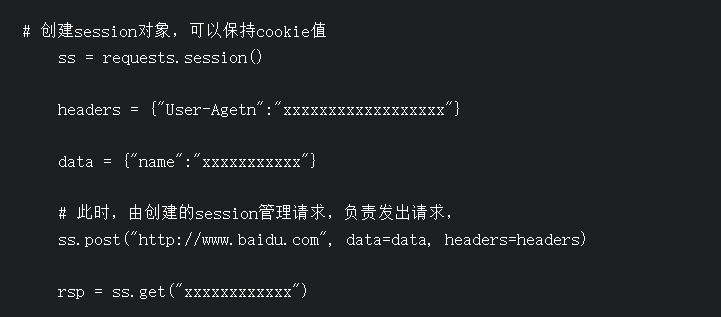

### https请求验证ssl证书
- 参数verify负责表示是否需要验证ssL证书，默认是True
- 如果不需要验证ssl证书，则设置成False表示关闭
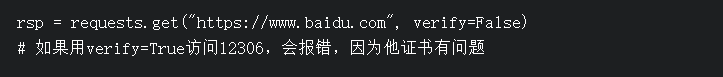